# Data Retrieval

In [4]:
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
import matplotlib.cm as cm

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
departamentos = ["AMAZONAS", "ANCASH", "APURIMAC", "AREQUIPA", "AYACUCHO", "CAJAMARCA", 
    "CALLAO", "CUSCO", "HUANCAVELICA", "HUANUCO", "ICA", "JUNIN", "LA%20LIBERTAD", "LAMBAYEQUE", 
    "LIMA%20DIRIS%20CENTRO", "LIMA%20DIRIS%20ESTE", "LIMA%20DIRIS%20NORTE", "LIMA%20DIRIS%20SUR", "LIMA", "LORETO",
     "MADRE%20DE%20DIOS", "MOQUEGUA", "PASCO", "PIURA", "PUNO", "SAN%20MARTIN", "TACNA", "TUMBES", "UCAYALI"]

url_base = "https://raw.githubusercontent.com/LuisSante/Datasets/main/Anemia/HIS%20Ni%C3%B1os%202019/HB/Ni%C3%B1os%20"

# departamentos = departamentos[:2]

dataset = []
for dep in departamentos:
    url = url_base + dep + ".csv"
    d = pd.read_csv(url, encoding='latin-1')
    # downsample randomly to reduce the size of the dataset by a factor of 2
    d = d.sample(frac=0.05, random_state=42)
    dataset.append(d)


In [32]:
# merge all the dataframes of dataset into one
data = pd.concat(dataset)
data = data.reset_index(drop=True)
data.head()

,ï»¿Diresa,Red,Microred,EESS,Renipress,FechaAtencion,Sexo,FechaNacimiento,EdadMeses,UbigeoPN,...,Cred,Suplementacion,Consejeria,Sesion,DEPARTAMENTO,PROVINCIA,DISTRITO,ALTITUD,HBC,Dx_Anemia
0,AMAZONAS,CONDORCANQUI,CANDUNGOS,I-1 - 00005186 - PAPAYACU,5186,11/22/2019,M,5/22/2016,42,10403.0,...,0,0,0,0,AMAZONAS,CONDORCANQUI,RIO SANTIAGO,480,11.695489,Normal
1,AMAZONAS,CONDORCANQUI,HUAMPAMI,I-1 - 00005165 - KUSU KUBAIM,5165,8/10/2019,F,5/10/2015,51,10402.0,...,0,0,1,0,AMAZONAS,CONDORCANQUI,EL CENEPA,220,11.311636,Normal
2,AMAZONAS,UTCUBAMBA,BAGUA GRANDE,I-3 - 00005134 - SAN MARTIN,5134,8/13/2019,M,2/3/2018,18,10701.0,...,0,0,0,0,AMAZONAS,UTCUBAMBA,BAGUA GRANDE,440,12.000081,Normal
3,AMAZONAS,BAGUA,IMAZA,I-3 - 00005070 - IMAZA,5070,9/24/2019,M,8/16/2017,25,130102.0,...,0,1,1,0,LA LIBERTAD,TRUJILLO,EL PORVENIR,90,11.007563,Normal
4,AMAZONAS,UTCUBAMBA,NO PERTENECE A NINGUNA MICRORED,I-4 - 00005125 - HOSPITAL SANTIAGO APOSTOL D...,5125,12/27/2019,F,12/27/2015,48,10701.0,...,0,0,0,0,AMAZONAS,UTCUBAMBA,BAGUA GRANDE,440,11.800081,Normal


In [33]:
# Available features
data.columns

Index(['ï»¿Diresa', 'Red', 'Microred', 'EESS', 'Renipress', 'FechaAtencion',
       'Sexo', 'FechaNacimiento', 'EdadMeses', 'UbigeoPN', 'DepartamentoPN',
       'ProvinciaPN', 'DistritoPN', 'CentroPobladoPN', 'Juntos', 'SIS', 'Pin',
       'Qaliwarma', 'Peso', 'Talla', 'Hemoglobina', 'FechaHemoglobina', 'Cred',
       'Suplementacion', 'Consejeria', 'Sesion', 'DEPARTAMENTO', 'PROVINCIA',
       'DISTRITO', 'ALTITUD', 'HBC', 'Dx_Anemia'],
      dtype='object')

# Preprocessing

In [41]:
df = data.copy()
df = df[['Sexo', 'Juntos', 'SIS', 'Qaliwarma', 'Peso', 'Talla', 'Hemoglobina', 'Cred', 'Suplementacion', 'ALTITUD', 'DepartamentoPN', 'HBC', 'Dx_Anemia']]
df.head()

,Sexo,Juntos,SIS,Qaliwarma,Peso,Talla,Hemoglobina,Cred,Suplementacion,ALTITUD,DepartamentoPN,HBC,Dx_Anemia
0,M,0,1,0,,,11.7,0,0,480,AMAZONAS,11.695489,Normal
1,F,1,1,0,12.3,90.2,11.3,0,0,220,AMAZONAS,11.311636,Normal
2,M,0,1,0,,,12.0,0,0,440,AMAZONAS,12.000081,Normal
3,M,0,0,0,11.1,84.6,11.0,0,1,90,LA LIBERTAD,11.007563,Normal
4,F,1,1,0,,,11.8,0,0,440,AMAZONAS,11.800081,Normal


In [42]:
# Sexo 
df['Sexo'] = df['Sexo'].fillna(df['Sexo'].mode()[0])
df['Sexo'] = df['Sexo'].map( {'F': 1, 'M': 0} ).astype(int)

# # Juntos
df['Juntos'] = df['Juntos'].fillna(df['Juntos'].mode()[0])

# # SIS
df['SIS'] = df['SIS'].fillna(df['SIS'].mode()[0])

# # Qaliwarma
df['Qaliwarma'] = df['Qaliwarma'].fillna(df['Qaliwarma'].mode()[0])

# Peso 
df['Peso'] = pd.to_numeric(df['Peso'], errors='coerce')
df['Peso'] = df['Peso'].fillna(df['Peso'].mean())

# Talla
df['Talla'] = pd.to_numeric(df['Talla'], errors='coerce')
df['Talla'] = df['Talla'].fillna(df['Talla'].mean())

df['Talla'] = df['Talla'].map(lambda x: talla_promedio if type(x) != float else x)

# # Hemoglobina
df['Hemoglobina'] = df['Hemoglobina'].fillna(df['Hemoglobina'].mean())

# # Cred
df['Cred'] = df['Cred'].fillna(df['Cred'].mode()[0])

# # Suplementacion
df['Suplementacion'] = df['Suplementacion'].fillna(df['Suplementacion'].mode()[0])

# # ALTITUD
df['ALTITUD'] = df['ALTITUD'].fillna(df['ALTITUD'].mode()[0])

# # DepartamentoPN
df['DepartamentoPN'] = df['DepartamentoPN'].fillna(df['DepartamentoPN'].mode()[0])
df['DepartamentoPN'] = df['DepartamentoPN'].astype('category')
df['DepartamentoPN'] = df['DepartamentoPN'].cat.codes


# # HBC
df['HBC'] = df['HBC'].fillna(df['HBC'].mode()[0])

# # Dx_Anemia
df['Dx_Anemia'] = df['Dx_Anemia'].fillna(df['Dx_Anemia'].mode()[0])

df.head()

,Sexo,Juntos,SIS,Qaliwarma,Peso,Talla,Hemoglobina,Cred,Suplementacion,ALTITUD,DepartamentoPN,HBC,Dx_Anemia
0,0,0,1,0,12.909019,82.466579,11.7,0,0,480,0,11.695489,Normal
1,1,1,1,0,12.300000,90.200000,11.3,0,0,220,0,11.311636,Normal
2,0,0,1,0,12.909019,82.466579,12.0,0,0,440,0,12.000081,Normal
3,0,0,0,0,11.100000,84.600000,11.0,0,1,90,12,11.007563,Normal
4,1,1,1,0,12.909019,82.466579,11.8,0,0,440,0,11.800081,Normal


In [43]:
# unique values of Dx_Anemia
list(df['Dx_Anemia'].unique())

['Normal', 'Anemia Leve', 'Anemia Moderada', 'Anemia Severa']

In [44]:
df['Dx_Anemia'] = df['Dx_Anemia'].map({'Normal': 0, 'Anemia Leve': 1, 'Anemia Moderada': 2, 'Anemia Severa': 3, np.nan: df['Dx_Anemia'].mode()}) 
# base_data = df.copy()
df.head()

,Sexo,Juntos,SIS,Qaliwarma,Peso,Talla,Hemoglobina,Cred,Suplementacion,ALTITUD,DepartamentoPN,HBC,Dx_Anemia
0,0,0,1,0,12.909019,82.466579,11.7,0,0,480,0,11.695489,0
1,1,1,1,0,12.300000,90.200000,11.3,0,0,220,0,11.311636,0
2,0,0,1,0,12.909019,82.466579,12.0,0,0,440,0,12.000081,0
3,0,0,0,0,11.100000,84.600000,11.0,0,1,90,12,11.007563,0
4,1,1,1,0,12.909019,82.466579,11.8,0,0,440,0,11.800081,0


In [45]:
# standardize the all data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df = df_scaled
df.head()

,Sexo,Juntos,SIS,Qaliwarma,Peso,Talla,Hemoglobina,Cred,Suplementacion,ALTITUD,DepartamentoPN,HBC,Dx_Anemia
0,-0.975967,-0.383309,0.357513,-0.142752,-1.301780e-16,0.000000,-0.205339,-0.94397,-0.599353,-0.537932,-1.873030,0.319160,-0.636147
1,1.024624,2.608865,0.357513,-0.142752,-4.463120e-02,0.150156,-0.490348,-0.94397,-0.599353,-0.726024,-1.873030,0.008662,-0.636147
2,-0.975967,-0.383309,0.357513,-0.142752,-1.301780e-16,0.000000,0.008417,-0.94397,-0.599353,-0.566870,-1.873030,0.565546,-0.636147
3,-0.975967,-0.383309,-2.797102,-0.142752,-1.325717e-01,0.041424,-0.704105,-0.94397,1.668465,-0.820070,0.003105,-0.237303,-0.636147
4,1.024624,2.608865,0.357513,-0.142752,-1.301780e-16,0.000000,-0.134087,-0.94397,-0.599353,-0.566870,-1.873030,0.403765,-0.636147


# Feature selection

### Matriz de Correlación

,Sexo,Juntos,SIS,Qaliwarma,Peso,Talla,Hemoglobina,Cred,Suplementacion,ALTITUD,DepartamentoPN,HBC,Dx_Anemia
0,-0.975967,-0.383309,0.357513,-0.142752,-1.301780e-16,0.000000,-0.205339,-0.94397,-0.599353,-0.537932,-1.873030,0.319160,-0.636147
1,1.024624,2.608865,0.357513,-0.142752,-4.463120e-02,0.150156,-0.490348,-0.94397,-0.599353,-0.726024,-1.873030,0.008662,-0.636147
2,-0.975967,-0.383309,0.357513,-0.142752,-1.301780e-16,0.000000,0.008417,-0.94397,-0.599353,-0.566870,-1.873030,0.565546,-0.636147
3,-0.975967,-0.383309,-2.797102,-0.142752,-1.325717e-01,0.041424,-0.704105,-0.94397,1.668465,-0.820070,0.003105,-0.237303,-0.636147
4,1.024624,2.608865,0.357513,-0.142752,-1.301780e-16,0.000000,-0.134087,-0.94397,-0.599353,-0.566870,-1.873030,0.403765,-0.636147


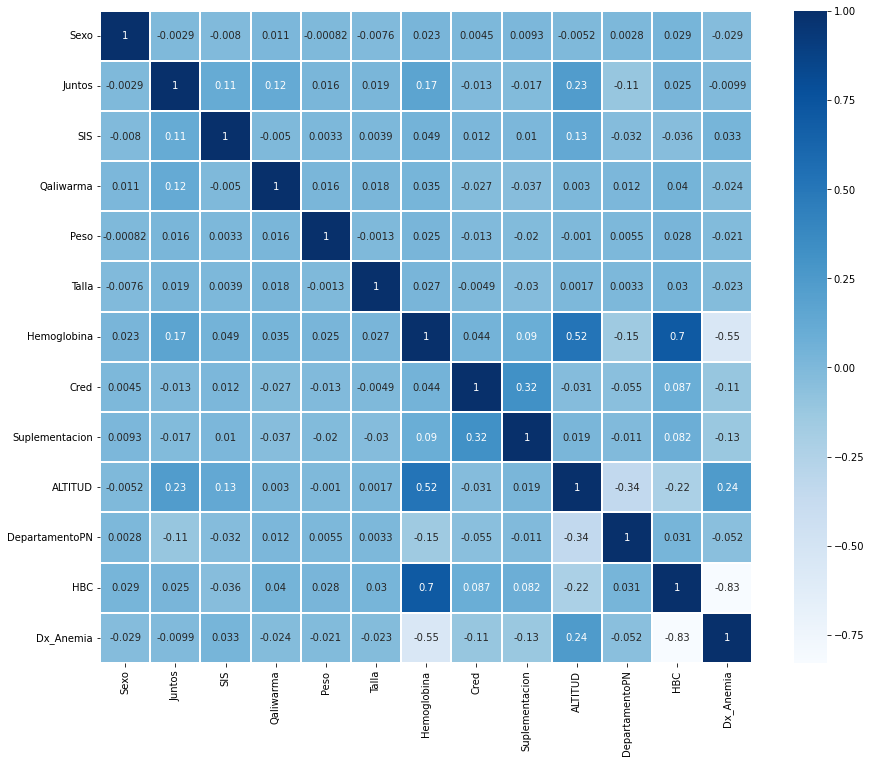

In [48]:
# matrix = df.copy()
plt.figure(figsize=(15, 12))
corr = df.corr()
sns.heatmap(corr, linewidths=0.1,vmax=1.0, square=True, cmap="Blues", linecolor='white', annot=True)
matrix.head()

### Eliminación de variables no relevantes

In [49]:
df = df.drop(['Sexo', 'Juntos', 'SIS', 'Qaliwarma', 'Peso', 'Talla'], axis=1)
df.head()

,Hemoglobina,Cred,Suplementacion,ALTITUD,DepartamentoPN,HBC,Dx_Anemia
0,-0.205339,-0.94397,-0.599353,-0.537932,-1.873030,0.319160,-0.636147
1,-0.490348,-0.94397,-0.599353,-0.726024,-1.873030,0.008662,-0.636147
2,0.008417,-0.94397,-0.599353,-0.566870,-1.873030,0.565546,-0.636147
3,-0.704105,-0.94397,1.668465,-0.820070,0.003105,-0.237303,-0.636147
4,-0.134087,-0.94397,-0.599353,-0.566870,-1.873030,0.403765,-0.636147


# Clustering

### Silhouette Method

In [47]:
# silhouette score
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

def silhouette(data, n_max):
    best_k = 0
    best_n_clusters = 2
    for n_clusters in range(2, n_max):
        kmeans = KMeans(n_clusters=n_clusters)
        kmeans.fit(data)
        labels = kmeans.predict(data)
        silhouette_avg = silhouette_score(data, labels)
        print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)
        if silhouette_avg > best_k:
            best_k = silhouette_avg
            best_n_clusters = n_clusters

    print("The best number of clusters is:", best_n_clusters)
    return best_n_clusters



In [75]:
temp = df.copy()
temp = temp[['ALTITUD', 'Hemoglobina']]
best_n_clusters = silhouette(temp, 8)
kmeans = KMeans(n_clusters=best_n_clusters, random_state=0).fit(temp)
kmeans.predict(temp)
labels = pd.Series(kmeans.labels_, name="class")
# X.join(labels)
temp['class'] = labels
temp.head()

For n_clusters = 2 The average silhouette_score is : 0.559656504737094
For n_clusters = 3 The average silhouette_score is : 0.514279413965337
For n_clusters = 4 The average silhouette_score is : 0.4522542062688624
For n_clusters = 5 The average silhouette_score is : 0.4459387828841993
For n_clusters = 6 The average silhouette_score is : 0.4295236893437581
For n_clusters = 7 The average silhouette_score is : 0.4085328648835792
The best number of clusters is: 2


,ALTITUD,Hemoglobina,class
0,-0.537932,-0.205339,1
1,-0.726024,-0.490348,1
2,-0.566870,0.008417,1
3,-0.820070,-0.704105,1
4,-0.566870,-0.134087,1


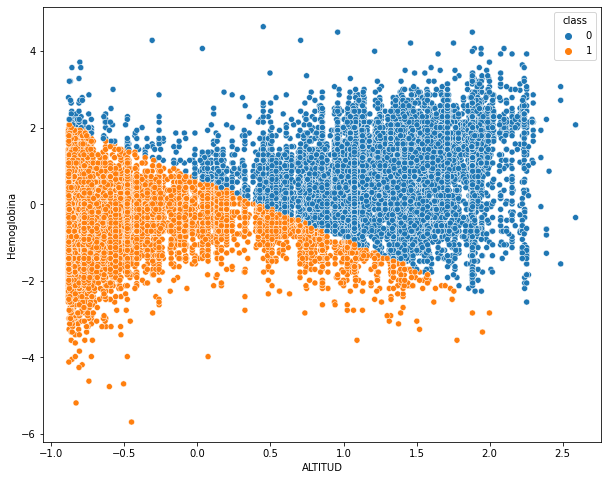

In [76]:
# PLOT CLUSTER
plt.figure(figsize=(10, 8))
sns.scatterplot(x=temp['ALTITUD'], y=temp['Hemoglobina'], hue=temp['class'], data=temp)
plt.show()


In [133]:
cop = df.copy()

limit = 0.69

noise = np.random.uniform(low=-limit, high=limit, size=len(cop['Dx_Anemia']))
cop['Dx_Anemia'] = cop['Dx_Anemia'] + noise
cop.head()

,Hemoglobina,Cred,Suplementacion,ALTITUD,DepartamentoPN,HBC,Dx_Anemia,class
0,-0.205339,-0.94397,-0.599353,-0.537932,-1.873030,0.319160,-0.237928,1
1,-0.490348,-0.94397,-0.599353,-0.726024,-1.873030,0.008662,-1.247918,1
2,0.008417,-0.94397,-0.599353,-0.566870,-1.873030,0.565546,-0.889650,1
3,-0.704105,-0.94397,1.668465,-0.820070,0.003105,-0.237303,-0.076824,1
4,-0.134087,-0.94397,-0.599353,-0.566870,-1.873030,0.403765,-1.203403,1


In [134]:
cop = cop[['ALTITUD', 'Dx_Anemia']]
best_n_clusters = silhouette(cop, 6)
kmeans = KMeans(n_clusters=best_n_clusters, random_state=0).fit(cop)
kmeans.predict(cop)
labels = pd.Series(kmeans.labels_, name="class")
cop['class'] = labels
cop.head()

For n_clusters = 2 The average silhouette_score is : 0.49163610131891705
For n_clusters = 3 The average silhouette_score is : 0.5417928532990751
For n_clusters = 4 The average silhouette_score is : 0.5736717682009247
For n_clusters = 5 The average silhouette_score is : 0.4887240055409452
The best number of clusters is: 4


,ALTITUD,Dx_Anemia,class
0,-0.537932,-0.237928,1
1,-0.726024,-1.247918,1
2,-0.566870,-0.889650,1
3,-0.820070,-0.076824,1
4,-0.566870,-1.203403,1


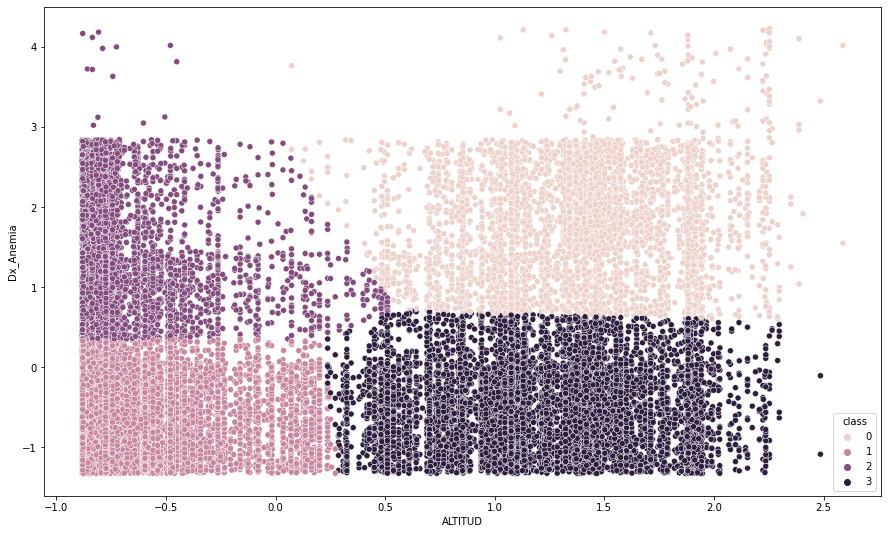

In [143]:
# PLOT CLUSTER
plt.figure(figsize=(15, 9))
sns.scatterplot(x=cop['ALTITUD'], y=cop['Dx_Anemia'], hue=cop['class'], data=cop)
plt.show()

# k-NN Classifier

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      9310
           2       0.97      0.95      0.96      1266
           3       0.90      0.80      0.85        45

    accuracy                           0.99     10621
   macro avg       0.95      0.92      0.93     10621
weighted avg       0.99      0.99      0.99     10621



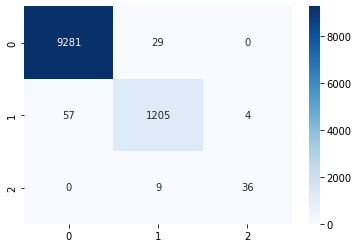

In [74]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

aux = df.copy()
aux['Dx_Anemia'] = aux['Dx_Anemia'].astype('int64')

X = aux.drop(['Dx_Anemia'], axis=1)
y = aux['Dx_Anemia']

# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# train the model
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

# predict the test data
y_pred = classifier.predict(X_test)

# evaluate the model
from sklearn.metrics import classification_report, confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
print(classification_report(y_test, y_pred))

# Variable Analysis

## Qaliwarma affects anemia cases?

In [247]:
df.columns


Index(['Sexo', 'Juntos', 'SIS', 'Qaliwarma', 'Peso', 'Talla', 'Hemoglobina',
       'Cred', 'Suplementacion', 'ALTITUD', 'HBC', 'Dx_Anemia'],
      dtype='object')

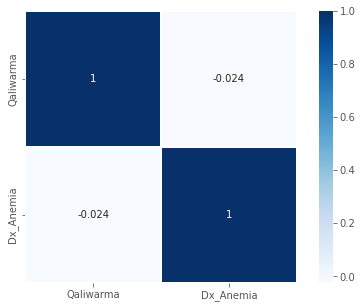

In [248]:
QW_data = df[['Qaliwarma', 'Dx_Anemia']]
# QW_data.loc['Dx_Anemia'] = QW_data['Dx_Anemia'].map({0: 0, 1:0, 2:1, 3:1})


plt.figure(figsize=(8, 5))
corr = QW_data.corr()
sns.heatmap(corr, linewidths=0.1,vmax=1.0, square=True, cmap="Blues", linecolor='white', annot=True)
plt.show() 

## CRED affects anemia cases?

C:\Users\jackc\AppData\Local\Temp\ipykernel_13752\3081099521.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cred_data.loc['Dx_Anemia'] = Cred_data['Dx_Anemia'].map({0: 0, 1:0, 2:1, 3:1})


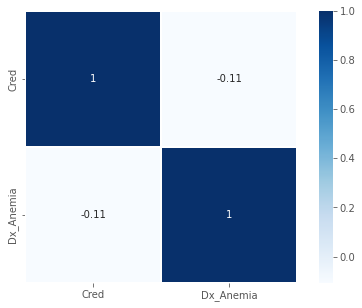

In [249]:
Cred_data = df[['Cred', 'Dx_Anemia']]
Cred_data.loc['Dx_Anemia'] = Cred_data['Dx_Anemia'].map({0: 0, 1:0, 2:1, 3:1})


plt.figure(figsize=(8, 5))
corr = Cred_data.corr()
sns.heatmap(corr, linewidths=0.1,vmax=1.0, square=True, cmap="Blues", linecolor='white', annot=True)
plt.show() 

## Juntos affects anemia cases?  

C:\Users\jackc\AppData\Local\Temp\ipykernel_13752\3147606408.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Juntos_data.loc['Dx_Anemia'] = Juntos_data['Dx_Anemia'].map({0: 0, 1:0, 2:1, 3:1})


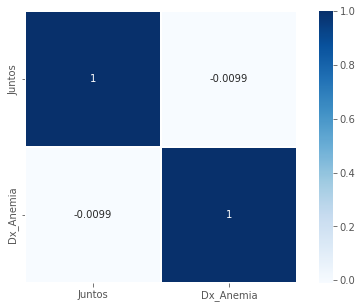

In [250]:
Juntos_data = df[['Juntos', 'Dx_Anemia']]
Juntos_data.loc['Dx_Anemia'] = Juntos_data['Dx_Anemia'].map({0: 0, 1:0, 2:1, 3:1})


plt.figure(figsize=(8, 5))
corr = Juntos_data.corr()
sns.heatmap(corr, linewidths=0.1,vmax=1.0, square=True, cmap="Blues", linecolor='white', annot=True)
plt.show() 